In [1]:
# Imports
import keras
import numpy as np
import matplotlib.pyplot as plt
import os, glob, random, cv2
import skimage.transform

from model import Model

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Load test data
test_images_path = 'data/test_images.npy'
test_label_path = 'data/test_labels.npy'
test_images = np.load(test_images_path)
test_labels = np.load(test_label_path)
print(len(test_images), len(test_labels))

91 91


In [3]:
# Rescale image to 0..1 as it is now in uint8
test_images *= 1./255

In [4]:
# Parameters
IMAGE_DIM = (512,512,)

ROOT_DIR = os.getcwd()
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')
CATEGORIES = [folder for folder in os.listdir(IMAGE_DIR) 
               if os.path.isdir(os.path.join(IMAGE_DIR, folder))]
CATEGORIES.sort() # Alphabetical order
NUM_CLASSES = len(CATEGORIES)
print('{} classes: {}'.format(NUM_CLASSES, CATEGORIES))

10 classes: ['aeschynanthus_parvifolius', 'bougainvillea_glabra', 'costus_woodsonii_maas', 'hedychium', 'hibiscus_rosa_sinensis', 'ixora_congesta', 'jasminum_sambac', 'lycoris', 'papilionanthe_miss_joaqium', 'plumeria']


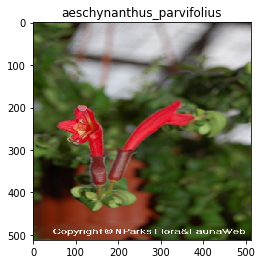

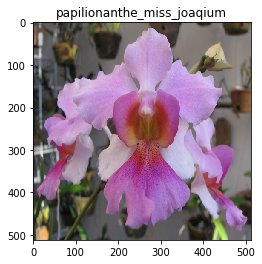

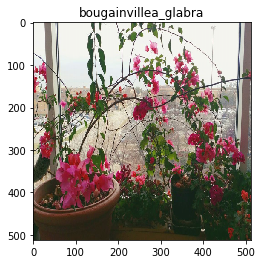

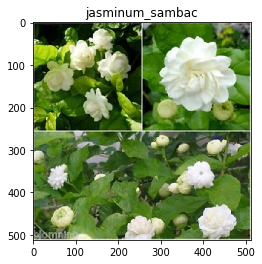

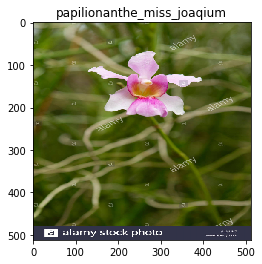

In [5]:
# Check random images
for _ in range(5):
    random_idx = random.randint(0, len(test_images) - 1)
    rdm_image, rdm_label = test_images[random_idx] * 255, test_labels[random_idx]
    rdm_label = np.argmax(rdm_label, axis=0) # Convert from one-hot to integer
    rdm_image = rdm_image[...,::-1] # Convert from BGR to RGB
    plt.figure()
    plt.title(CATEGORIES[rdm_label])
    plt.imshow(rdm_image)

In [6]:
# Load model
MODEL_NAME = "inception-resnet"
model = Model.getCompiledModel(MODEL_NAME, IMAGE_DIM, NUM_CLASSES)

In [7]:
# Load trained weights
last_epoch = 272
model.load_weights('{}_weights.{:d}.h5'.format(MODEL_NAME, last_epoch))

ResourceExhaustedError: OOM when allocating tensor with shape[1,1,448,2080]
	 [[Node: block8_3_conv/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=2249487, _device="/job:localhost/replica:0/task:0/device:GPU:0"](block8_1_conv/random_uniform/shape)]]

Caused by op 'block8_3_conv/random_uniform/RandomUniform', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-19b204aeee94>", line 3, in <module>
    model = Model.getCompiledModel(MODEL_NAME, IMAGE_DIM, NUM_CLASSES)
  File "/home/nbuser/cs3244/model.py", line 19, in getCompiledModel
    model = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True, weights=None, input_shape=input_shape, pooling=None, classes=num_classes)
  File "/usr/local/lib/python3.6/dist-packages/keras/applications/inception_resnet_v2.py", line 323, in InceptionResNetV2
    block_idx=block_idx)
  File "/usr/local/lib/python3.6/dist-packages/keras/applications/inception_resnet_v2.py", line 166, in inception_resnet_block
    name=block_name + '_conv')
  File "/usr/local/lib/python3.6/dist-packages/keras/applications/inception_resnet_v2.py", line 87, in conv2d_bn
    name=name)(x)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py", line 590, in __call__
    self.build(input_shapes[0])
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/convolutional.py", line 138, in build
    constraint=self.kernel_constraint)
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py", line 411, in add_weight
    weight = K.variable(initializer(shape),
  File "/usr/local/lib/python3.6/dist-packages/keras/initializers.py", line 217, in __call__
    dtype=dtype, seed=self.seed)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 3829, in random_uniform
    dtype=dtype, seed=seed)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/random_ops.py", line 240, in random_uniform
    shape, dtype, seed=seed1, seed2=seed2)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_random_ops.py", line 473, in _random_uniform
    name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1,1,448,2080]
	 [[Node: block8_3_conv/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=2249487, _device="/job:localhost/replica:0/task:0/device:GPU:0"](block8_1_conv/random_uniform/shape)]]


In [ ]:
test_image = cv2.imread("/Users/qinghao1/Documents/CS/ML/Projects/cs3244/images/hibiscus_rosa_sinensis/5a608220aa3b4b30acd7d1d11cc1312a.jpg")
test_image = skimage.transform.resize(test_image, (512,512))
test_image /= 255
test_image.shape = (1,) + test_image.shape
print(test_image.shape)
test_result = model.predict(test_image)
print(test_result)
test_result = np.argmax(test_result[0], axis=0)
print(test_result)
print(CATEGORIES[test_result])

In [ ]:
# Evaluate model
scores = model.evaluate(x=test_images, y=test_labels) #[loss, accuracy]
print(scores)